# Deep Learning Fractal-1 : Assignment-1( Programming/Experimentation)

## Roll Number: M22AI567

## CNN model to train binary one-vs.-rest SVM classifiers using the training data of  the PASCAL dataset

### Importing requires libraries

In [1]:
import os
import numpy as np
import xml.etree.ElementTree as ET
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

### Load pre-trained VGG16 model

In [2]:
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights='imagenet', include_top=True)

### Remove the prediction layer

In [3]:
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)

### Define the path to the PASCAL VOC 2007 dataset

In [4]:
data_dir = 'C:/Users/admin/Downloads/VOCtrainval_06-Nov-2007/VOCdevkit/VOC2007'
image_dir = os.path.join(data_dir, 'JPEGImages')
annotation_dir = os.path.join(data_dir, 'Annotations')

### Extract features and labels from the dataset

In [7]:
import shutil
features = []
labels = []
# Get the list of image files
image_files = os.listdir(image_dir)
for image_file in image_files:
    # Load and preprocess the image
    print('image file is ',image_file)
    img_path = os.path.join(image_dir, image_file)
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)

    # Extract features using the pre-trained model
    img_features = model.predict(img)
    features.append(img_features)

    # Extract class labels from the annotations
    annotation_file = image_file.split('.')[0] + '.xml'
    annotation_path = os.path.join(annotation_dir, annotation_file)

    # Parse XML annotation file
    tree = ET.parse(annotation_path)
    root = tree.getroot()

    # Find the class labels
    class_labels = []
    for obj in root.findall('object'):
        class_label = obj.find('name').text
        print('class labels', class_label)
        class_labels.append(class_label)

    labels.append(class_labels)
    # Move image to class folders
    for class_label in class_labels:
        class_folder = os.path.join('./class/folders', class_label)
        os.makedirs(class_folder, exist_ok=True)
        destination_path = os.path.join(class_folder, image_file)
        shutil.copy(img_path, destination_path)       
        
        


image file is  000005.jpg
1/1 [==============================] - 0s 255ms/step
class labels chair
class labels chair
class labels chair
class labels chair
class labels chair
image file is  000007.jpg
1/1 [==============================] - 0s 233ms/step
class labels car
image file is  000009.jpg
1/1 [==============================] - 0s 240ms/step
class labels horse
class labels person
class labels person
class labels person
image file is  000012.jpg
1/1 [==============================] - 0s 260ms/step
class labels car
image file is  000016.jpg
1/1 [==============================] - 0s 233ms/step
class labels bicycle
image file is  000017.jpg
1/1 [==============================] - 0s 262ms/step
class labels person
class labels horse
image file is  000019.jpg
1/1 [==============================] - 0s 232ms/step
class labels cat
class labels cat
image file is  000020.jpg
1/1 [==============================] - 0s 283ms/step
class labels car
image file is  000021.jpg
1/1 [==================

1/1 [==============================] - 0s 282ms/step
class labels boat
class labels boat
class labels boat
image file is  000242.jpg
1/1 [==============================] - 0s 266ms/step
class labels cat
image file is  000244.jpg
1/1 [==============================] - 0s 234ms/step
class labels sheep
image file is  000245.jpg
1/1 [==============================] - 0s 238ms/step
class labels car
class labels person
image file is  000246.jpg
1/1 [==============================] - 0s 237ms/step
class labels dog
image file is  000249.jpg
1/1 [==============================] - 0s 258ms/step
class labels chair
class labels chair
class labels chair
class labels chair
class labels chair
class labels chair
class labels chair
class labels diningtable
image file is  000250.jpg
1/1 [==============================] - 0s 238ms/step
class labels diningtable
class labels bottle
image file is  000251.jpg
1/1 [==============================] - 0s 250ms/step
class labels car
class labels car
class labels 

1/1 [==============================] - 0s 232ms/step
class labels bottle
class labels bottle
class labels bottle
class labels bottle
class labels car
class labels car
class labels person
image file is  000370.jpg
1/1 [==============================] - 0s 266ms/step
class labels boat
class labels boat
image file is  000372.jpg
1/1 [==============================] - 0s 244ms/step
class labels person
class labels horse
class labels horse
image file is  000373.jpg
1/1 [==============================] - 0s 235ms/step
class labels car
image file is  000374.jpg
1/1 [==============================] - 0s 231ms/step
class labels motorbike
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
image file is  000379.jpg
1/1 [==============================] - 0s 262ms/step
class labels bicycle
image file is  000380.jpg
1/1 [==============================] - 0s 285ms/step
clas

1/1 [==============================] - 0s 234ms/step
class labels person
class labels motorbike
image file is  000500.jpg
1/1 [==============================] - 0s 251ms/step
class labels bicycle
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
image file is  000501.jpg
1/1 [==============================] - 0s 226ms/step
class labels dog
image file is  000503.jpg
1/1 [==============================] - 0s 219ms/step
class labels sofa
class labels sofa
image file is  000508.jpg
1/1 [==============================] - 0s 234ms/step
class labels bird
class labels bird
class labels bird
class labels bird
class labels bird
image file is  000509.jpg
1/1 [==============================] - 0s 245ms/step
class labels car
image file is  000513.jpg
1/1 [==============================] - 0s 219ms/step
class labels boat
image file is  000514.jpg
1/1 [==============================] - 0s 232ms/step
class labels

1/1 [==============================] - 0s 219ms/step
class labels bottle
class labels person
class labels person
image file is  000728.jpg
1/1 [==============================] - 0s 234ms/step
class labels cow
image file is  000729.jpg
1/1 [==============================] - 0s 219ms/step
class labels pottedplant
image file is  000730.jpg
1/1 [==============================] - 0s 234ms/step
class labels aeroplane
image file is  000731.jpg
1/1 [==============================] - 0s 219ms/step
class labels bird
class labels person
class labels person
image file is  000733.jpg
1/1 [==============================] - 0s 234ms/step
class labels person
class labels motorbike
image file is  000738.jpg
1/1 [==============================] - 0s 234ms/step
class labels aeroplane
image file is  000739.jpg
1/1 [==============================] - 0s 219ms/step
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
image

1/1 [==============================] - 0s 216ms/step
class labels diningtable
class labels chair
class labels chair
class labels chair
image file is  000831.jpg
1/1 [==============================] - 0s 232ms/step
class labels train
image file is  000832.jpg
1/1 [==============================] - 0s 232ms/step
class labels bird
image file is  000834.jpg
1/1 [==============================] - 0s 232ms/step
class labels cow
class labels cow
class labels cow
class labels cow
class labels cow
class labels person
image file is  000842.jpg
1/1 [==============================] - 0s 232ms/step
class labels dog
class labels person
image file is  000843.jpg
1/1 [==============================] - 0s 232ms/step
class labels tvmonitor
class labels person
image file is  000845.jpg
1/1 [==============================] - 0s 216ms/step
class labels aeroplane
image file is  000847.jpg
1/1 [==============================] - 0s 232ms/step
class labels diningtable
class labels person
image file is  000848.

1/1 [==============================] - 0s 234ms/step
class labels car
class labels person
class labels car
class labels car
image file is  000943.jpg
1/1 [==============================] - 0s 234ms/step
class labels chair
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
class labels sofa
class labels person
class labels person
class labels person
image file is  000946.jpg
1/1 [==============================] - 0s 219ms/step
class labels train
class labels train
image file is  000947.jpg
1/1 [==============================] - 0s 234ms/step
class labels dog
image file is  000948.jpg
1/1 [==============================] - 0s 234ms/step
class labels tvmonitor
class labels chair
class labels person
image file is  000949.jpg
1/1 [==============================] - 0s 219ms/step
class labels bicycle
class labels bicycle
class labels person
class labels person
image file is  000950.jpg
1/1 [==============================] - 

1/1 [==============================] - 0s 237ms/step
class labels cat
class labels person
class labels diningtable
class labels bottle
image file is  001186.jpg
1/1 [==============================] - 0s 235ms/step
class labels bicycle
class labels person
image file is  001187.jpg
1/1 [==============================] - 0s 250ms/step
class labels chair
class labels chair
class labels sofa
image file is  001191.jpg
1/1 [==============================] - 0s 235ms/step
class labels sheep
image file is  001192.jpg
1/1 [==============================] - 0s 234ms/step
class labels dog
class labels dog
image file is  001194.jpg
1/1 [==============================] - 0s 249ms/step
class labels bicycle
image file is  001199.jpg
1/1 [==============================] - 0s 231ms/step
class labels motorbike
class labels motorbike
image file is  001200.jpg
1/1 [==============================] - 0s 240ms/step
class labels train
image file is  001201.jpg
1/1 [==============================] - 0s 235ms/st

1/1 [==============================] - 0s 231ms/step
class labels motorbike
class labels person
class labels person
class labels person
class labels person
image file is  001427.jpg
1/1 [==============================] - 0s 232ms/step
class labels bicycle
class labels bicycle
class labels person
class labels person
image file is  001430.jpg
1/1 [==============================] - 0s 229ms/step
class labels diningtable
class labels person
class labels person
class labels person
class labels pottedplant
class labels tvmonitor
class labels pottedplant
image file is  001432.jpg
1/1 [==============================] - 0s 231ms/step
class labels car
image file is  001434.jpg
1/1 [==============================] - 0s 232ms/step
class labels person
class labels person
class labels bus
class labels bus
image file is  001436.jpg
1/1 [==============================] - 0s 229ms/step
class labels aeroplane
image file is  001439.jpg
1/1 [==============================] - 0s 229ms/step
class labels din

1/1 [==============================] - 0s 236ms/step
class labels bottle
class labels bottle
image file is  001523.jpg
1/1 [==============================] - 0s 217ms/step
class labels horse
class labels person
image file is  001524.jpg
1/1 [==============================] - 0s 232ms/step
class labels dog
class labels person
class labels person
image file is  001526.jpg
1/1 [==============================] - 0s 225ms/step
class labels person
class labels person
class labels person
class labels person
class labels person
image file is  001528.jpg
1/1 [==============================] - 0s 216ms/step
class labels bird
image file is  001529.jpg
1/1 [==============================] - 0s 224ms/step
class labels tvmonitor
class labels sofa
class labels chair
image file is  001531.jpg
1/1 [==============================] - 0s 231ms/step
class labels chair
class labels chair
class labels person
class labels person
image file is  001532.jpg
1/1 [==============================] - 0s 214ms/step
cl

1/1 [==============================] - 0s 219ms/step
class labels aeroplane
image file is  001640.jpg
1/1 [==============================] - 0s 260ms/step
class labels car
class labels car
class labels person
class labels car
class labels person
image file is  001642.jpg
1/1 [==============================] - 0s 263ms/step
class labels dog
image file is  001643.jpg
1/1 [==============================] - 0s 251ms/step
class labels sofa
class labels dog
image file is  001647.jpg
1/1 [==============================] - 0s 255ms/step
class labels bird
image file is  001649.jpg
1/1 [==============================] - 0s 248ms/step
class labels chair
class labels person
image file is  001650.jpg
1/1 [==============================] - 0s 261ms/step
class labels tvmonitor
class labels sofa
class labels chair
image file is  001651.jpg
1/1 [==============================] - 0s 262ms/step
class labels person
class labels chair
image file is  001653.jpg
1/1 [==============================] - 0s 231m

1/1 [==============================] - 0s 236ms/step
class labels sofa
class labels chair
image file is  001887.jpg
1/1 [==============================] - 0s 219ms/step
class labels chair
class labels chair
class labels chair
class labels chair
class labels chair
class labels chair
class labels chair
class labels diningtable
class labels diningtable
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
class labels boat
image file is  001888.jpg
1/1 [==============================] - 0s 219ms/step
class labels cat
image file is  001892.jpg
1/1 [==============================] - 0s 278ms/step
class labels bus
image file is  001894.jpg
1/1 [==============================] - 0s 248ms/step
class labels person
class labels horse
image file is  001896.jpg
1/1 [==============================] - 0s 278ms/step
class labels bird
image file is  001898.jpg
1/1 [==============================] 

1/1 [==============================] - 0s 232ms/step
class labels bird
image file is  002139.jpg
1/1 [==============================] - 0s 234ms/step
class labels bottle
image file is  002140.jpg
1/1 [==============================] - 0s 234ms/step
class labels dog
image file is  002142.jpg
1/1 [==============================] - 0s 223ms/step
class labels person
class labels person
class labels person
image file is  002145.jpg
1/1 [==============================] - 0s 219ms/step
class labels cat
class labels person
image file is  002146.jpg
1/1 [==============================] - 0s 222ms/step
class labels dog
image file is  002151.jpg
1/1 [==============================] - 0s 219ms/step
class labels cat
image file is  002152.jpg
1/1 [==============================] - 0s 225ms/step
class labels cow
image file is  002153.jpg
1/1 [==============================] - 0s 235ms/step
class labels car
image file is  002155.jpg
1/1 [==============================] - 0s 219ms/step
class labels mot

class labels car
image file is  002249.jpg
1/1 [==============================] - 0s 219ms/step
class labels horse
image file is  002251.jpg
1/1 [==============================] - 0s 237ms/step
class labels sofa
image file is  002253.jpg
1/1 [==============================] - 0s 219ms/step
class labels bicycle
class labels bottle
class labels bottle
image file is  002255.jpg
1/1 [==============================] - 0s 220ms/step
class labels aeroplane
image file is  002256.jpg
1/1 [==============================] - 0s 219ms/step
class labels bus
class labels bus
class labels person
image file is  002257.jpg
1/1 [==============================] - 0s 219ms/step
class labels bicycle
image file is  002259.jpg
1/1 [==============================] - 0s 247ms/step
class labels sofa
image file is  002260.jpg
1/1 [==============================] - 0s 219ms/step
class labels motorbike
image file is  002261.jpg
1/1 [==============================] - 0s 229ms/step
class labels horse
class labels per

1/1 [==============================] - 0s 216ms/step
class labels chair
class labels chair
class labels sofa
class labels pottedplant
class labels pottedplant
class labels pottedplant
class labels pottedplant
class labels person
class labels person
image file is  002364.jpg
1/1 [==============================] - 0s 223ms/step
class labels dog
image file is  002366.jpg
1/1 [==============================] - 0s 252ms/step
class labels motorbike
class labels motorbike
image file is  002367.jpg
1/1 [==============================] - 0s 242ms/step
class labels person
class labels motorbike
image file is  002368.jpg
1/1 [==============================] - 0s 231ms/step
class labels sofa
class labels sofa
class labels chair
class labels chair
class labels diningtable
image file is  002369.jpg
1/1 [==============================] - 0s 234ms/step
class labels cow
image file is  002371.jpg
1/1 [==============================] - 0s 222ms/step
class labels bicycle
image file is  002372.jpg
1/1 [===

1/1 [==============================] - 0s 236ms/step
class labels bird
image file is  002589.jpg
1/1 [==============================] - 0s 250ms/step
class labels chair
class labels chair
class labels chair
class labels sofa
class labels person
class labels person
class labels person
class labels person
image file is  002590.jpg
1/1 [==============================] - 0s 235ms/step
class labels train
image file is  002593.jpg
1/1 [==============================] - 0s 239ms/step
class labels sheep
image file is  002594.jpg
1/1 [==============================] - 0s 271ms/step
class labels pottedplant
class labels pottedplant
class labels pottedplant
class labels pottedplant
class labels pottedplant
image file is  002595.jpg
1/1 [==============================] - 0s 254ms/step
class labels car
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person

1/1 [==============================] - 0s 266ms/step
class labels bus
image file is  002702.jpg
1/1 [==============================] - 0s 244ms/step
class labels chair
class labels chair
class labels chair
image file is  002704.jpg
1/1 [==============================] - 0s 247ms/step
class labels car
class labels car
image file is  002706.jpg
1/1 [==============================] - 0s 273ms/step
class labels cat
image file is  002709.jpg
1/1 [==============================] - 0s 250ms/step
class labels bird
image file is  002710.jpg
1/1 [==============================] - 0s 269ms/step
class labels person
image file is  002713.jpg
1/1 [==============================] - 0s 282ms/step
class labels horse
class labels person
class labels person
image file is  002714.jpg
1/1 [==============================] - 0s 216ms/step
class labels person
image file is  002715.jpg
1/1 [==============================] - 0s 234ms/step
class labels bicycle
class labels person
class labels person
class labels

1/1 [==============================] - 0s 219ms/step
class labels person
image file is  002816.jpg
1/1 [==============================] - 0s 224ms/step
class labels bus
image file is  002817.jpg
1/1 [==============================] - 0s 234ms/step
class labels pottedplant
image file is  002820.jpg
1/1 [==============================] - 0s 217ms/step
class labels pottedplant
class labels pottedplant
class labels pottedplant
image file is  002826.jpg
1/1 [==============================] - 0s 241ms/step
class labels dog
class labels dog
class labels person
class labels person
class labels person
class labels dog
image file is  002827.jpg
1/1 [==============================] - 0s 219ms/step
class labels person
class labels person
class labels person
class labels person
image file is  002833.jpg
1/1 [==============================] - 0s 269ms/step
class labels car
image file is  002834.jpg
1/1 [==============================] - 0s 242ms/step
class labels person
image file is  002835.jpg
1/1

1/1 [==============================] - 0s 237ms/step
class labels person
class labels person
class labels pottedplant
class labels pottedplant
class labels pottedplant
image file is  003045.jpg
1/1 [==============================] - 0s 234ms/step
class labels cat
image file is  003047.jpg
1/1 [==============================] - 0s 233ms/step
class labels bicycle
class labels bicycle
class labels bicycle
image file is  003051.jpg
1/1 [==============================] - 0s 235ms/step
class labels car
image file is  003053.jpg
1/1 [==============================] - 0s 239ms/step
class labels train
class labels train
class labels car
image file is  003054.jpg
1/1 [==============================] - 0s 235ms/step
class labels sofa
class labels car
image file is  003056.jpg
1/1 [==============================] - 0s 240ms/step
class labels diningtable
class labels chair
class labels chair
class labels chair
class labels bottle
class labels bottle
class labels bottle
class labels bottle
class lab

1/1 [==============================] - 0s 228ms/step
class labels bus
image file is  003155.jpg
1/1 [==============================] - 0s 234ms/step
class labels bird
image file is  003157.jpg
1/1 [==============================] - 0s 234ms/step
class labels tvmonitor
image file is  003159.jpg
1/1 [==============================] - 0s 232ms/step
class labels person
class labels person
class labels person
class labels bottle
class labels bottle
class labels bottle
image file is  003161.jpg
1/1 [==============================] - 0s 237ms/step
class labels sheep
class labels sheep
class labels sheep
class labels sheep
class labels dog
image file is  003162.jpg
1/1 [==============================] - 0s 258ms/step
class labels motorbike
class labels person
image file is  003163.jpg
1/1 [==============================] - 0s 241ms/step
class labels bus
image file is  003164.jpg
1/1 [==============================] - 0s 219ms/step
class labels train
image file is  003165.jpg
1/1 [=============

1/1 [==============================] - 0s 225ms/step
class labels aeroplane
class labels person
image file is  003390.jpg
1/1 [==============================] - 0s 230ms/step
class labels car
class labels car
class labels person
class labels person
class labels person
image file is  003391.jpg
1/1 [==============================] - 0s 229ms/step
class labels person
class labels motorbike
image file is  003392.jpg
1/1 [==============================] - 0s 231ms/step
class labels cat
image file is  003395.jpg
1/1 [==============================] - 0s 232ms/step
class labels bicycle
class labels sofa
class labels person
image file is  003396.jpg
1/1 [==============================] - 0s 232ms/step
class labels motorbike
class labels motorbike
class labels person
class labels person
image file is  003397.jpg
1/1 [==============================] - 0s 230ms/step
class labels person
class labels car
image file is  003398.jpg
1/1 [==============================] - 0s 215ms/step
class labels tv

class labels person
class labels person
class labels person
class labels horse
class labels horse
class labels horse
class labels horse
image file is  003620.jpg
1/1 [==============================] - 0s 233ms/step
class labels cat
image file is  003621.jpg
1/1 [==============================] - 0s 234ms/step
class labels bicycle
class labels person
class labels bus
class labels bus
image file is  003622.jpg
1/1 [==============================] - 0s 267ms/step
class labels pottedplant
class labels pottedplant
class labels pottedplant
image file is  003623.jpg
1/1 [==============================] - 0s 234ms/step
class labels bird
image file is  003625.jpg
1/1 [==============================] - 0s 331ms/step
class labels horse
class labels person
image file is  003627.jpg
1/1 [==============================] - 0s 255ms/step
class labels dog
image file is  003628.jpg
1/1 [==============================] - 0s 394ms/step
class labels person
class labels person
class labels train
image file 

1/1 [==============================] - 0s 225ms/step
class labels car
class labels car
class labels bus
class labels bus
image file is  003837.jpg
1/1 [==============================] - 0s 242ms/step
class labels chair
class labels chair
image file is  003838.jpg
1/1 [==============================] - 0s 247ms/step
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
image file is  003844.jpg
1/1 [==============================] - 0s 231ms/step
class labels cat
class labels cat
image file is  003845.jpg
1/1 [==============================] - 0s 234ms/step
class labels sofa
image file is  003846.jpg
1/1 [==============================] - 0s 226ms/step
class labels dog
class labels dog
image file is  003847.jpg
1/1 [==============================] - 0s 220ms/step
class labels person
class labels person
image file is  003848.jpg
1/1 [==============================] - 0s 233ms/step
class labels train
image file is  003849.j

1/1 [==============================] - 0s 240ms/step
class labels bird
image file is  003953.jpg
1/1 [==============================] - 0s 233ms/step
class labels sofa
class labels person
class labels person
class labels person
class labels person
class labels person
image file is  003954.jpg
1/1 [==============================] - 0s 233ms/step
class labels car
class labels car
class labels car
image file is  003956.jpg
1/1 [==============================] - 0s 246ms/step
class labels pottedplant
class labels pottedplant
image file is  003957.jpg
1/1 [==============================] - 0s 214ms/step
class labels train
image file is  003960.jpg
1/1 [==============================] - 0s 240ms/step
class labels horse
class labels horse
class labels person
class labels person
class labels person
class labels person
image file is  003961.jpg
1/1 [==============================] - 0s 214ms/step
class labels person
image file is  003963.jpg
1/1 [==============================] - 0s 236ms/step


1/1 [==============================] - 0s 219ms/step
class labels cow
class labels cow
class labels cow
image file is  004201.jpg
1/1 [==============================] - 0s 234ms/step
class labels person
class labels person
class labels chair
image file is  004203.jpg
1/1 [==============================] - 0s 219ms/step
class labels car
class labels car
class labels car
class labels car
image file is  004204.jpg
1/1 [==============================] - 0s 234ms/step
class labels bird
class labels bird
class labels bird
class labels bird
class labels bird
image file is  004205.jpg
1/1 [==============================] - 0s 234ms/step
class labels person
class labels person
class labels person
class labels person
image file is  004209.jpg
1/1 [==============================] - 0s 219ms/step
class labels dog
class labels dog
class labels person
class labels person
image file is  004212.jpg
1/1 [==============================] - 0s 230ms/step
class labels cat
class labels pottedplant
image fil

1/1 [==============================] - 0s 234ms/step
class labels bottle
class labels person
image file is  004323.jpg
1/1 [==============================] - 0s 219ms/step
class labels horse
class labels horse
class labels person
class labels person
image file is  004325.jpg
1/1 [==============================] - 0s 234ms/step
class labels boat
image file is  004326.jpg
1/1 [==============================] - 0s 219ms/step
class labels bird
image file is  004327.jpg
1/1 [==============================] - 0s 234ms/step
class labels dog
class labels person
class labels person
image file is  004329.jpg
1/1 [==============================] - 0s 234ms/step
class labels car
class labels car
class labels car
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
image file is  004331.jpg
1/1 [==============================] - 0s 250ms/step
class labels tvmonitor
image file is  004333.jpg
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 234ms/step
class labels train
class labels train
class labels person
class labels person
class labels person
class labels train
class labels train
image file is  004438.jpg
1/1 [==============================] - 0s 237ms/step
class labels dog
class labels person
class labels person
class labels tvmonitor
image file is  004439.jpg
1/1 [==============================] - 0s 219ms/step
class labels car
class labels car
class labels car
class labels car
image file is  004441.jpg
1/1 [==============================] - 0s 219ms/step
class labels cow
image file is  004446.jpg
1/1 [==============================] - 0s 219ms/step
class labels cat
class labels pottedplant
image file is  004450.jpg
1/1 [==============================] - 0s 212ms/step
class labels horse
image file is  004452.jpg
1/1 [==============================] - 0s 250ms/step
class labels aeroplane
image file is  004455.jpg
1/1 [==============================] - 0s 226ms/step
class lab

1/1 [==============================] - 0s 237ms/step
class labels aeroplane
image file is  004558.jpg
1/1 [==============================] - 0s 234ms/step
class labels pottedplant
class labels pottedplant
class labels pottedplant
class labels pottedplant
image file is  004562.jpg
1/1 [==============================] - 0s 238ms/step
class labels person
class labels person
class labels sofa
image file is  004563.jpg
1/1 [==============================] - 0s 243ms/step
class labels car
class labels car
class labels car
class labels person
class labels person
class labels person
image file is  004565.jpg
1/1 [==============================] - 0s 237ms/step
class labels dog
image file is  004566.jpg
1/1 [==============================] - 0s 234ms/step
class labels cat
class labels cat
image file is  004570.jpg
1/1 [==============================] - 0s 229ms/step
class labels aeroplane
image file is  004571.jpg
1/1 [==============================] - 0s 245ms/step
class labels cow
class label

1/1 [==============================] - 0s 229ms/step
class labels pottedplant
class labels pottedplant
image file is  004683.jpg
1/1 [==============================] - 0s 219ms/step
class labels cat
image file is  004685.jpg
1/1 [==============================] - 0s 234ms/step
class labels person
class labels person
image file is  004686.jpg
1/1 [==============================] - 0s 223ms/step
class labels horse
class labels horse
class labels person
class labels person
class labels cow
class labels cow
class labels cow
class labels cow
class labels cow
class labels cow
class labels cow
class labels cow
class labels cow
class labels cow
class labels cow
class labels cow
image file is  004687.jpg
1/1 [==============================] - 0s 219ms/step
class labels motorbike
class labels person
class labels person
class labels car
image file is  004689.jpg
1/1 [==============================] - 0s 222ms/step
class labels train
image file is  004691.jpg
1/1 [==============================] -

1/1 [==============================] - 0s 219ms/step
class labels sofa
image file is  004939.jpg
1/1 [==============================] - 0s 234ms/step
class labels pottedplant
class labels chair
class labels person
image file is  004943.jpg
1/1 [==============================] - 0s 234ms/step
class labels bottle
class labels diningtable
class labels person
class labels person
class labels person
class labels person
class labels bottle
image file is  004946.jpg
1/1 [==============================] - 0s 234ms/step
class labels person
class labels car
class labels car
image file is  004948.jpg
1/1 [==============================] - 0s 219ms/step
class labels pottedplant
class labels pottedplant
class labels pottedplant
class labels pottedplant
image file is  004950.jpg
1/1 [==============================] - 0s 234ms/step
class labels horse
class labels person
image file is  004951.jpg
1/1 [==============================] - 0s 234ms/step
class labels train
class labels train
image file is  

1/1 [==============================] - 0s 220ms/step
class labels car
class labels person
class labels car
image file is  005160.jpg
1/1 [==============================] - 0s 246ms/step
class labels chair
class labels chair
class labels chair
class labels chair
class labels chair
class labels chair
class labels diningtable
class labels diningtable
class labels tvmonitor
class labels person
class labels pottedplant
class labels pottedplant
class labels bottle
image file is  005161.jpg
1/1 [==============================] - 0s 271ms/step
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
class labels horse
class labels horse
class labels horse
class labels horse
class labels horse
image file is  005168.jpg
1/1 [==============================] - 0s 258ms/step
class labels train
image file is  005169.jpg
1/1 [==============================] - 0s 238ms/step
class labels cat
class labels car
class labels

1/1 [==============================] - 0s 243ms/step
class labels cat
image file is  005273.jpg
1/1 [==============================] - 0s 237ms/step
class labels car
class labels car
class labels person
class labels person
class labels bicycle
image file is  005274.jpg
1/1 [==============================] - 0s 234ms/step
class labels dog
class labels dog
class labels person
image file is  005278.jpg
1/1 [==============================] - 0s 223ms/step
class labels horse
class labels horse
class labels horse
class labels person
class labels person
class labels person
class labels person
class labels person
image file is  005281.jpg
1/1 [==============================] - 0s 220ms/step
class labels bicycle
class labels person
class labels person
class labels person
class labels person
image file is  005283.jpg
1/1 [==============================] - 0s 228ms/step
class labels person
class labels person
class labels person
image file is  005285.jpg
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 229ms/step
class labels aeroplane
image file is  005395.jpg
1/1 [==============================] - 0s 223ms/step
class labels sheep
class labels sheep
class labels sheep
class labels sheep
class labels sheep
class labels sheep
class labels sheep
class labels sheep
class labels sheep
class labels sheep
image file is  005396.jpg
1/1 [==============================] - 0s 233ms/step
class labels tvmonitor
class labels person
class labels person
image file is  005397.jpg
1/1 [==============================] - 0s 235ms/step
class labels sofa
class labels chair
class labels chair
class labels chair
image file is  005398.jpg
1/1 [==============================] - 0s 249ms/step
class labels motorbike
class labels person
class labels person
image file is  005404.jpg
1/1 [==============================] - 0s 244ms/step
class labels cow
image file is  005405.jpg
1/1 [==============================] - 0s 234ms/step
class labels person
image file is  005406.

1/1 [==============================] - 0s 235ms/step
class labels person
class labels chair
image file is  005509.jpg
1/1 [==============================] - 0s 219ms/step
class labels aeroplane
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
class labels car
class labels car
class labels car
class labels car
class labels car
class labels car
image file is  005510.jpg
1/1 [==============================] - 0s 237ms/step
class labels sofa
image file is  005511.jpg
1/1 [==============================] - 0s 245ms/step
class labels horse
class labels person
image file is  005514.jpg
1/1 [==============================] - 0s 258ms/step
class labels cow
class labels cow
image file is  005515.jpg
1/1 [==============================] - 0s 313ms/step
class labels pott

1/1 [==============================] - 0s 235ms/step
class labels car
class labels car
class labels car
class labels car
class labels car
class labels car
image file is  005611.jpg
1/1 [==============================] - 0s 240ms/step
class labels horse
class labels person
image file is  005613.jpg
1/1 [==============================] - 0s 234ms/step
class labels person
class labels dog
image file is  005614.jpg
1/1 [==============================] - 0s 249ms/step
class labels boat
class labels boat
class labels boat
image file is  005615.jpg
1/1 [==============================] - 0s 240ms/step
class labels motorbike
class labels person
image file is  005618.jpg
1/1 [==============================] - 0s 235ms/step
class labels tvmonitor
class labels chair
class labels chair
class labels chair
class labels person
class labels person
image file is  005620.jpg
1/1 [==============================] - 0s 239ms/step
class labels aeroplane
image file is  005624.jpg
1/1 [========================

1/1 [==============================] - 0s 255ms/step
class labels cat
image file is  005839.jpg
1/1 [==============================] - 0s 219ms/step
class labels car
class labels car
image file is  005840.jpg
1/1 [==============================] - 0s 238ms/step
class labels person
class labels person
class labels person
class labels person
class labels person
image file is  005841.jpg
1/1 [==============================] - 0s 234ms/step
class labels cow
image file is  005843.jpg
1/1 [==============================] - 0s 218ms/step
class labels cow
image file is  005845.jpg
1/1 [==============================] - 0s 248ms/step
class labels cat
class labels person
image file is  005850.jpg
1/1 [==============================] - 0s 234ms/step
class labels cat
class labels person
image file is  005851.jpg
1/1 [==============================] - 0s 240ms/step
class labels train
image file is  005852.jpg
1/1 [==============================] - 0s 232ms/step
class labels tvmonitor
class labels t

1/1 [==============================] - 0s 234ms/step
class labels aeroplane
class labels aeroplane
image file is  005954.jpg
1/1 [==============================] - 0s 264ms/step
class labels cat
image file is  005956.jpg
1/1 [==============================] - 0s 263ms/step
class labels car
class labels car
class labels person
class labels person
image file is  005960.jpg
1/1 [==============================] - 0s 289ms/step
class labels cat
image file is  005961.jpg
1/1 [==============================] - 0s 265ms/step
class labels bus
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
image file is  005963.jpg
1/1 [==============================] - 0s 287ms/step
class labels chair
class labels chair
class labels chair
class labels chair
image file is  005964.jpg
1/1 [==============================] - 0s 277ms/step
class labels sheep
image file is  005968.jpg
1/1 [==============================] - 0s 219ms/step
class la

1/1 [==============================] - 0s 256ms/step
class labels tvmonitor
class labels chair
class labels chair
image file is  006079.jpg
1/1 [==============================] - 0s 280ms/step
class labels boat
class labels car
class labels car
image file is  006084.jpg
1/1 [==============================] - 0s 259ms/step
class labels cat
image file is  006088.jpg
1/1 [==============================] - 0s 255ms/step
class labels chair
class labels chair
class labels sofa
class labels sofa
class labels sofa
class labels pottedplant
image file is  006089.jpg
1/1 [==============================] - 0s 295ms/step
class labels car
image file is  006091.jpg
1/1 [==============================] - 0s 253ms/step
class labels bird
class labels bird
image file is  006095.jpg
1/1 [==============================] - 0s 250ms/step
class labels cow
class labels horse
class labels person
image file is  006096.jpg
1/1 [==============================] - 0s 305ms/step
class labels bus
image file is  006097

1/1 [==============================] - 0s 242ms/step
class labels dog
image file is  006196.jpg
1/1 [==============================] - 0s 243ms/step
class labels car
image file is  006198.jpg
1/1 [==============================] - 0s 230ms/step
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
image file is  006201.jpg
1/1 [==============================] - 0s 234ms/step
class labels train
class labels car
image file is  006202.jpg
1/1 [==============================] - 0s 254ms/step
class labels cow
class labels cow
class labels cow
image file is  006203.jpg
1/1 [==============================] - 0s 260ms/step
class labels car
class labels car
image file is  006206.jpg
1/1 [==============================] - 0s 252ms/step
class labels bicycle
class labels bicycle
class labels car
image file is  006208.jpg
1/1 [============================

1/1 [==============================] - 0s 237ms/step
class labels car
class labels car
class labels car
class labels car
image file is  006418.jpg
1/1 [==============================] - 0s 293ms/step
class labels bicycle
image file is  006419.jpg
1/1 [==============================] - 0s 284ms/step
class labels chair
class labels chair
image file is  006421.jpg
1/1 [==============================] - 0s 237ms/step
class labels car
class labels car
class labels car
image file is  006424.jpg
1/1 [==============================] - 0s 275ms/step
class labels sofa
class labels chair
image file is  006425.jpg
1/1 [==============================] - 0s 259ms/step
class labels cat
image file is  006427.jpg
1/1 [==============================] - 0s 222ms/step
class labels person
class labels person
class labels person
image file is  006428.jpg
1/1 [==============================] - 0s 248ms/step
class labels horse
class labels person
class labels person
image file is  006429.jpg
1/1 [============

1/1 [==============================] - 0s 249ms/step
class labels person
class labels person
class labels person
class labels motorbike
image file is  006648.jpg
1/1 [==============================] - 0s 238ms/step
class labels bottle
class labels person
class labels person
class labels person
image file is  006652.jpg
1/1 [==============================] - 0s 239ms/step
class labels train
image file is  006654.jpg
1/1 [==============================] - 0s 241ms/step
class labels car
class labels car
class labels car
image file is  006657.jpg
1/1 [==============================] - 0s 254ms/step
class labels cat
image file is  006658.jpg
1/1 [==============================] - 0s 256ms/step
class labels diningtable
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
class labels chair
class labels chair
class labels chair
image file is  006660.jpg
1/1 [=========

1/1 [==============================] - 0s 234ms/step
class labels bus
image file is  006760.jpg
1/1 [==============================] - 0s 256ms/step
class labels cat
class labels tvmonitor
class labels tvmonitor
image file is  006761.jpg
1/1 [==============================] - 0s 247ms/step
class labels cow
image file is  006762.jpg
1/1 [==============================] - 0s 241ms/step
class labels motorbike
class labels person
class labels person
image file is  006765.jpg
1/1 [==============================] - 0s 255ms/step
class labels chair
class labels pottedplant
class labels pottedplant
class labels pottedplant
class labels pottedplant
image file is  006766.jpg
1/1 [==============================] - 0s 254ms/step
class labels bus
class labels car
class labels car
class labels car
class labels car
class labels car
class labels car
class labels car
class labels car
class labels car
class labels person
image file is  006768.jpg
1/1 [==============================] - 0s 234ms/step
clas

1/1 [==============================] - 0s 221ms/step
class labels chair
class labels cat
class labels cat
image file is  006981.jpg
1/1 [==============================] - 0s 248ms/step
class labels person
image file is  006983.jpg
1/1 [==============================] - 0s 250ms/step
class labels boat
class labels person
image file is  006987.jpg
1/1 [==============================] - 0s 246ms/step
class labels tvmonitor
class labels person
class labels person
image file is  006988.jpg
1/1 [==============================] - 0s 291ms/step
class labels car
class labels person
image file is  006989.jpg
1/1 [==============================] - 0s 282ms/step
class labels cat
class labels person
image file is  006990.jpg
1/1 [==============================] - 0s 322ms/step
class labels bicycle
class labels person
image file is  006994.jpg
1/1 [==============================] - 0s 244ms/step
class labels dog
image file is  006995.jpg
1/1 [==============================] - 0s 248ms/step
class lab

1/1 [==============================] - 0s 224ms/step
class labels motorbike
image file is  007212.jpg
1/1 [==============================] - 0s 225ms/step
class labels dog
class labels chair
class labels chair
image file is  007213.jpg
1/1 [==============================] - 0s 232ms/step
class labels chair
class labels chair
class labels chair
class labels chair
class labels chair
class labels diningtable
class labels person
class labels person
image file is  007214.jpg
1/1 [==============================] - 0s 229ms/step
class labels dog
class labels person
class labels person
image file is  007215.jpg
1/1 [==============================] - 0s 226ms/step
class labels cow
image file is  007216.jpg
1/1 [==============================] - 0s 230ms/step
class labels horse
class labels person
image file is  007217.jpg
1/1 [==============================] - 0s 231ms/step
class labels sheep
class labels sheep
class labels sheep
class labels sheep
class labels sheep
class labels sheep
class la

1/1 [==============================] - 0s 251ms/step
class labels person
class labels bottle
image file is  007458.jpg
1/1 [==============================] - 0s 231ms/step
class labels chair
class labels chair
class labels chair
class labels diningtable
class labels tvmonitor
image file is  007460.jpg
1/1 [==============================] - 0s 232ms/step
class labels boat
image file is  007461.jpg
1/1 [==============================] - 0s 249ms/step
class labels bottle
class labels bottle
class labels bottle
class labels bottle
class labels bottle
class labels bottle
class labels bottle
class labels bottle
class labels bottle
class labels bottle
image file is  007465.jpg
1/1 [==============================] - 0s 233ms/step
class labels tvmonitor
image file is  007466.jpg
1/1 [==============================] - 0s 233ms/step
class labels motorbike
class labels motorbike
class labels bicycle
class labels person
class labels person
class labels motorbike
class labels chair
class labels pers

1/1 [==============================] - 0s 247ms/step
class labels bus
image file is  007576.jpg
1/1 [==============================] - 0s 231ms/step
class labels horse
class labels person
image file is  007578.jpg
1/1 [==============================] - 0s 247ms/step
class labels dog
class labels dog
class labels dog
class labels dog
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
class labels dog
image file is  007579.jpg
1/1 [==============================] - 0s 250ms/step
class labels person
class labels person
class labels person
class labels person
class labels person
image file is  007585.jpg
1/1 [==============================] - 0s 246ms/step
class labels dog
class labels dog
image file is  007586.jpg
1/1 [==============================] - 0s 245ms/step
class labels train
class labels person
class labels person
class labels person
class labels person
class labels person
image file is  007590.jpg
1/1 [=======

1/1 [==============================] - 0s 228ms/step
class labels car
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
image file is  007702.jpg
1/1 [==============================] - 0s 231ms/step
class labels tvmonitor
image file is  007704.jpg
1/1 [==============================] - 0s 233ms/step
class labels pottedplant
class labels sofa
class labels sofa
image file is  007705.jpg
1/1 [==============================] - 0s 228ms/step
class labels dog
class labels horse
image file is  007709.jpg
1/1 [==============================] - 0s 248ms/step
class labels person
class labels person
class labels bicycle
class labels car
class labels car
class labels car
class labels car
image file is  007712.jpg
1/1 [==============================] - 0s 247ms/step
class labels motorbike
class labels person
image file is  007713.jpg
1/1 [==============================] - 0s 242ms/step
class labels bird
image file is  007715.jpg


1/1 [==============================] - 0s 224ms/step
class labels train
class labels car
image file is  007820.jpg
1/1 [==============================] - 0s 233ms/step
class labels aeroplane
class labels aeroplane
image file is  007821.jpg
1/1 [==============================] - 0s 229ms/step
class labels car
class labels person
class labels person
image file is  007824.jpg
1/1 [==============================] - 0s 224ms/step
class labels cat
image file is  007826.jpg
1/1 [==============================] - 0s 233ms/step
class labels diningtable
class labels chair
class labels chair
class labels chair
class labels chair
class labels chair
class labels chair
image file is  007831.jpg
1/1 [==============================] - 0s 226ms/step
class labels bird
image file is  007833.jpg
1/1 [==============================] - 0s 238ms/step
class labels boat
class labels bird
image file is  007834.jpg
1/1 [==============================] - 0s 226ms/step
class labels dog
image file is  007836.jpg
1/

1/1 [==============================] - 0s 231ms/step
class labels car
class labels car
class labels car
class labels car
class labels car
class labels car
class labels car
class labels person
class labels person
class labels person
class labels person
class labels person
image file is  007933.jpg
1/1 [==============================] - 0s 234ms/step
class labels bicycle
image file is  007935.jpg
1/1 [==============================] - 0s 235ms/step
class labels dog
class labels sofa
image file is  007939.jpg
1/1 [==============================] - 0s 246ms/step
class labels cow
image file is  007940.jpg
1/1 [==============================] - 0s 243ms/step
class labels person
image file is  007943.jpg
1/1 [==============================] - 0s 225ms/step
class labels person
class labels person
class labels person
image file is  007946.jpg
1/1 [==============================] - 0s 245ms/step
class labels person
class labels dog
image file is  007947.jpg
1/1 [==============================] -

1/1 [==============================] - 0s 249ms/step
class labels tvmonitor
image file is  008051.jpg
1/1 [==============================] - 0s 244ms/step
class labels bird
image file is  008053.jpg
1/1 [==============================] - 0s 251ms/step
class labels bird
class labels bird
class labels bird
class labels person
image file is  008057.jpg
1/1 [==============================] - 0s 235ms/step
class labels car
image file is  008060.jpg
1/1 [==============================] - 0s 239ms/step
class labels car
image file is  008061.jpg
1/1 [==============================] - 0s 228ms/step
class labels bottle
class labels bottle
class labels bottle
class labels bottle
class labels bottle
image file is  008062.jpg
1/1 [==============================] - 0s 241ms/step
class labels bird
image file is  008063.jpg
1/1 [==============================] - 0s 237ms/step
class labels chair
class labels chair
class labels chair
image file is  008064.jpg
1/1 [==============================] - 0s 24

1/1 [==============================] - 0s 233ms/step
class labels car
class labels car
class labels person
class labels person
image file is  008163.jpg
1/1 [==============================] - 0s 246ms/step
class labels boat
class labels boat
class labels boat
class labels boat
class labels boat
class labels person
class labels person
image file is  008164.jpg
1/1 [==============================] - 0s 230ms/step
class labels person
class labels person
class labels person
class labels bottle
class labels bottle
image file is  008166.jpg
1/1 [==============================] - 0s 240ms/step
class labels boat
class labels boat
image file is  008168.jpg
1/1 [==============================] - 0s 231ms/step
class labels bird
image file is  008169.jpg
1/1 [==============================] - 0s 236ms/step
class labels cat
class labels car
image file is  008171.jpg
1/1 [==============================] - 0s 248ms/step
class labels chair
class labels chair
class labels diningtable
class labels potte

1/1 [==============================] - 0s 234ms/step
class labels tvmonitor
class labels sofa
class labels sofa
image file is  008284.jpg
1/1 [==============================] - 0s 230ms/step
class labels dog
class labels person
class labels chair
image file is  008285.jpg
1/1 [==============================] - 0s 232ms/step
class labels tvmonitor
class labels person
image file is  008292.jpg
1/1 [==============================] - 0s 248ms/step
class labels sheep
class labels sheep
class labels sheep
class labels sheep
class labels sheep
class labels sheep
image file is  008293.jpg
1/1 [==============================] - 0s 244ms/step
class labels bus
class labels bus
class labels person
class labels person
image file is  008294.jpg
1/1 [==============================] - 0s 232ms/step
class labels car
class labels motorbike
class labels person
class labels car
class labels car
image file is  008295.jpg
1/1 [==============================] - 0s 232ms/step
class labels train
image file is 

1/1 [==============================] - 0s 245ms/step
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
image file is  008403.jpg
1/1 [==============================] - 0s 263ms/step
class labels cat
image file is  008409.jpg
1/1 [==============================] - 0s 246ms/step
class labels tvmonitor
class labels sofa
image file is  008410.jpg
1/1 [==============================] - 0s 246ms/step
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
image file is  008413.jpg
1/1 [==============================] - 0s 247ms/step
class labels person
class labels person
class labels chair
class labels chair
image file is  008415.jpg
1/1 [==============================] - 0s 234ms/step
class labels dog
class labels dog
image file is  008416.jpg
1/1 [==============================]

1/1 [==============================] - 0s 250ms/step
class labels car
image file is  008518.jpg
1/1 [==============================] - 0s 229ms/step
class labels dog
image file is  008519.jpg
1/1 [==============================] - 0s 236ms/step
class labels bird
image file is  008521.jpg
1/1 [==============================] - 0s 237ms/step
class labels cat
image file is  008522.jpg
1/1 [==============================] - 0s 226ms/step
class labels aeroplane
image file is  008523.jpg
1/1 [==============================] - 0s 232ms/step
class labels aeroplane
class labels aeroplane
image file is  008524.jpg
1/1 [==============================] - 0s 248ms/step
class labels car
class labels horse
image file is  008526.jpg
1/1 [==============================] - 0s 246ms/step
class labels horse
class labels horse
class labels person
class labels person
class labels person
image file is  008529.jpg
1/1 [==============================] - 0s 226ms/step
class labels diningtable
class labels dinin

1/1 [==============================] - 0s 233ms/step
class labels dog
class labels dog
class labels dog
image file is  008644.jpg
1/1 [==============================] - 0s 247ms/step
class labels person
class labels person
class labels person
class labels person
class labels person
image file is  008645.jpg
1/1 [==============================] - 0s 231ms/step
class labels boat
image file is  008647.jpg
1/1 [==============================] - 0s 232ms/step
class labels person
image file is  008653.jpg
1/1 [==============================] - 0s 230ms/step
class labels horse
image file is  008654.jpg
1/1 [==============================] - 0s 249ms/step
class labels bird
image file is  008655.jpg
1/1 [==============================] - 0s 235ms/step
class labels pottedplant
class labels dog
class labels dog
class labels tvmonitor
class labels diningtable
class labels chair
class labels chair
class labels chair
class labels chair
image file is  008663.jpg
1/1 [==============================] -

1/1 [==============================] - 0s 249ms/step
class labels person
class labels person
image file is  008770.jpg
1/1 [==============================] - 0s 235ms/step
class labels aeroplane
image file is  008771.jpg
1/1 [==============================] - 0s 230ms/step
class labels bus
class labels person
class labels person
class labels person
image file is  008772.jpg
1/1 [==============================] - 0s 250ms/step
class labels cat
image file is  008773.jpg
1/1 [==============================] - 0s 227ms/step
class labels bird
image file is  008775.jpg
1/1 [==============================] - 0s 235ms/step
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
image file is  008776.jpg
1/1 [==============================] - 0s 231ms/step
class labels bird
image file is  008783.jpg
1/1 [=========

1/1 [==============================] - 0s 248ms/step
class labels boat
class labels boat
class labels boat
class labels boat
class labels boat
class labels boat
class labels boat
image file is  009000.jpg
1/1 [==============================] - 0s 231ms/step
class labels dog
class labels person
class labels person
class labels person
class labels car
image file is  009002.jpg
1/1 [==============================] - 0s 229ms/step
class labels train
image file is  009004.jpg
1/1 [==============================] - 0s 232ms/step
class labels motorbike
class labels motorbike
class labels motorbike
class labels motorbike
image file is  009005.jpg
1/1 [==============================] - 0s 247ms/step
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
class labels bicycle
class labels bicycle
class labels bicycle
image file is  009006.jpg
1/1 [==============================] - 0s 232ms/step
class labels car
c

1/1 [==============================] - 0s 238ms/step
class labels sofa
class labels person
class labels person
class labels bottle
class labels bottle
image file is  009244.jpg
1/1 [==============================] - 0s 228ms/step
class labels cat
image file is  009245.jpg
1/1 [==============================] - 0s 224ms/step
class labels cow
class labels cow
image file is  009246.jpg
1/1 [==============================] - 0s 228ms/step
class labels bird
image file is  009247.jpg
1/1 [==============================] - 0s 235ms/step
class labels diningtable
class labels chair
class labels chair
class labels chair
class labels chair
image file is  009249.jpg
1/1 [==============================] - 0s 232ms/step
class labels tvmonitor
class labels chair
class labels chair
image file is  009250.jpg
1/1 [==============================] - 0s 233ms/step
class labels bicycle
image file is  009251.jpg
1/1 [==============================] - 0s 244ms/step
class labels horse
class labels person
image

1/1 [==============================] - 0s 320ms/step
class labels cat
image file is  009465.jpg
1/1 [==============================] - 0s 302ms/step
class labels horse
image file is  009466.jpg
1/1 [==============================] - 0s 255ms/step
class labels chair
image file is  009468.jpg
1/1 [==============================] - 0s 284ms/step
class labels horse
class labels person
image file is  009469.jpg
1/1 [==============================] - 0s 257ms/step
class labels car
class labels car
class labels person
class labels person
class labels person
class labels person
class labels person
class labels person
class labels car
image file is  009470.jpg
1/1 [==============================] - 0s 236ms/step
class labels sofa
class labels cat
class labels cat
image file is  009472.jpg
1/1 [==============================] - 0s 245ms/step
class labels aeroplane
image file is  009476.jpg
1/1 [==============================] - 0s 260ms/step
class labels aeroplane
image file is  009477.jpg
1/1 [

1/1 [==============================] - 0s 305ms/step
class labels bus
image file is  009686.jpg
1/1 [==============================] - 0s 315ms/step
class labels pottedplant
class labels pottedplant
class labels pottedplant
class labels pottedplant
class labels pottedplant
class labels pottedplant
class labels pottedplant
class labels pottedplant
image file is  009687.jpg
1/1 [==============================] - 0s 273ms/step
class labels person
class labels person
class labels bottle
class labels bottle
image file is  009691.jpg
1/1 [==============================] - 0s 273ms/step
class labels motorbike
class labels person
image file is  009692.jpg
1/1 [==============================] - 0s 277ms/step
class labels bird
class labels bird
image file is  009693.jpg
1/1 [==============================] - 0s 260ms/step
class labels person
class labels person
class labels sofa
image file is  009695.jpg
1/1 [==============================] - 0s 255ms/step
class labels train
image file is  00969

1/1 [==============================] - 0s 262ms/step
class labels cow
class labels cow
image file is  009898.jpg
1/1 [==============================] - 0s 280ms/step
class labels car
image file is  009900.jpg
1/1 [==============================] - 0s 243ms/step
class labels car
class labels person
class labels person
class labels person
class labels person
image file is  009902.jpg
1/1 [==============================] - 0s 246ms/step
class labels bottle
class labels bottle
class labels bottle
class labels person
class labels person
class labels person
image file is  009904.jpg
1/1 [==============================] - 0s 265ms/step
class labels car
image file is  009905.jpg
1/1 [==============================] - 0s 241ms/step
class labels aeroplane
class labels aeroplane
image file is  009908.jpg
1/1 [==============================] - 0s 297ms/step
class labels cow
class labels cow
class labels bird
class labels bird
class labels bird
image file is  009911.jpg
1/1 [=======================

In [8]:
# Convert features and labels to NumPy arrays
features = np.vstack(features)
labels = np.array(labels)

C:\Users\admin\AppData\Local\Temp\ipykernel_3332\461490853.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.array(labels)


### Save the extracted features

In [9]:
features_path = './features.npy'
np.save(features_path, features)

In [10]:
labels_path = './labels.npy'
np.save(labels_path, labels)

In [11]:
features.shape

(5011, 4096)

In [12]:
labels.shape

(5011,)

### Use the features extracted from the last fully-connected layer (just before the prediction layer) of the CNN model to train binary one-vs.-rest SVM classifiers using the training data of the PASCAL dataset (you can use any standard library for SVM training), and evaluate the classification accuracy for all the 20 classes on the validation set. Also provide the confusion matrix.

In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MultiLabelBinarizer

### Load the extracted features and labels

In [25]:
features = np.load('D:/Krishna_Python/DeepLearningAssigment/features.npy',allow_pickle=True)
labels = np.load('D:/Krishna_Python/DeepLearningAssigment/labels.npy',allow_pickle=True)

In [26]:
# Create a MultiLabelBinarizer and fit it on the labels
mlb = MultiLabelBinarizer()
mlb.fit(labels)

# Transform the labels using the fitted MultiLabelBinarizer
labels_binary = mlb.transform(labels)

### Split the data into training and validation sets

In [27]:
train_features, val_features, train_labels, val_labels = train_test_split(features, labels_binary, test_size=0.2, random_state=42)


### Train binary SVM classifiers for each class

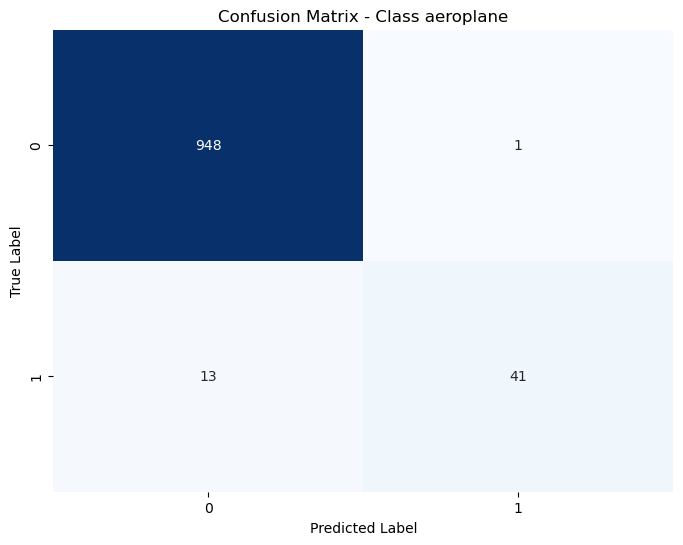

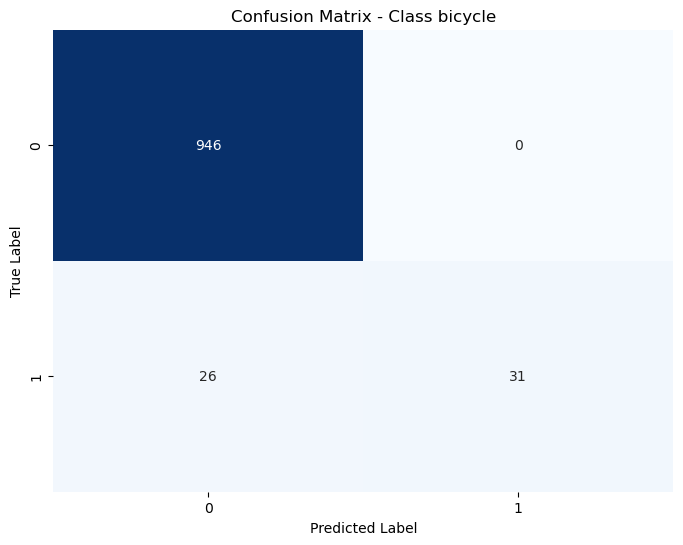

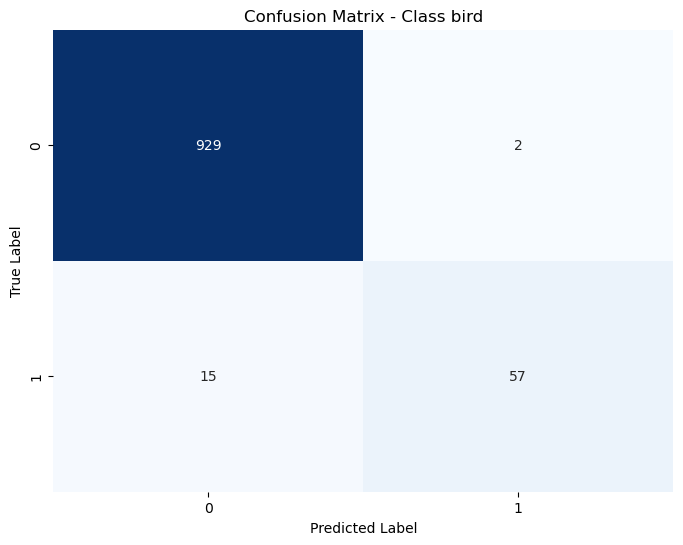

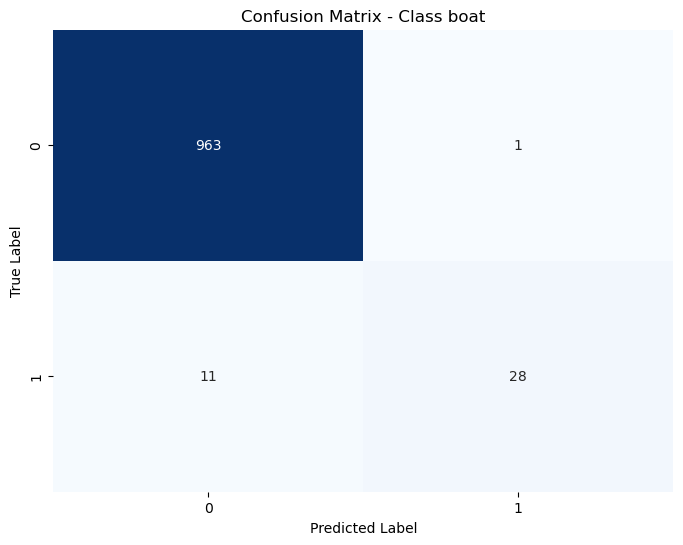

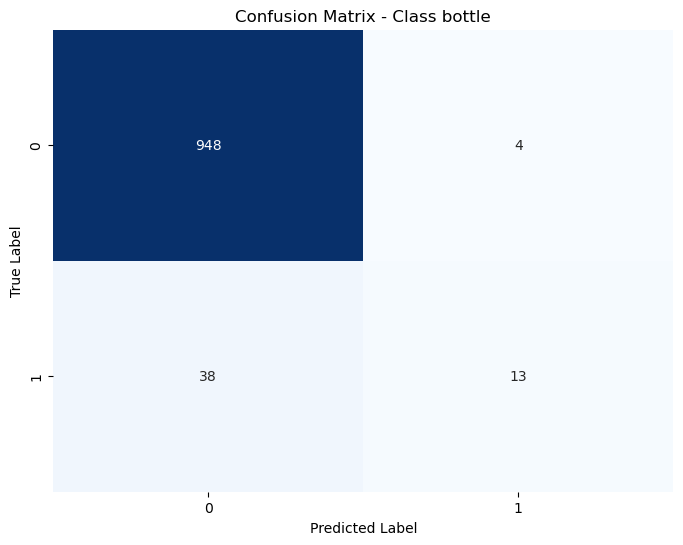

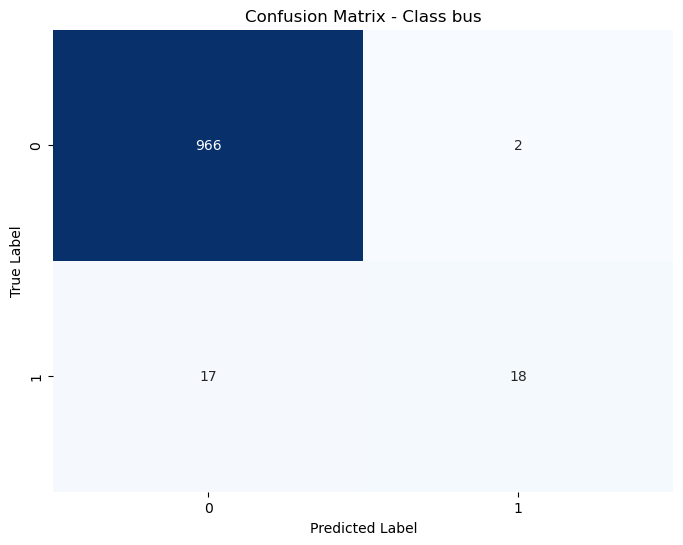

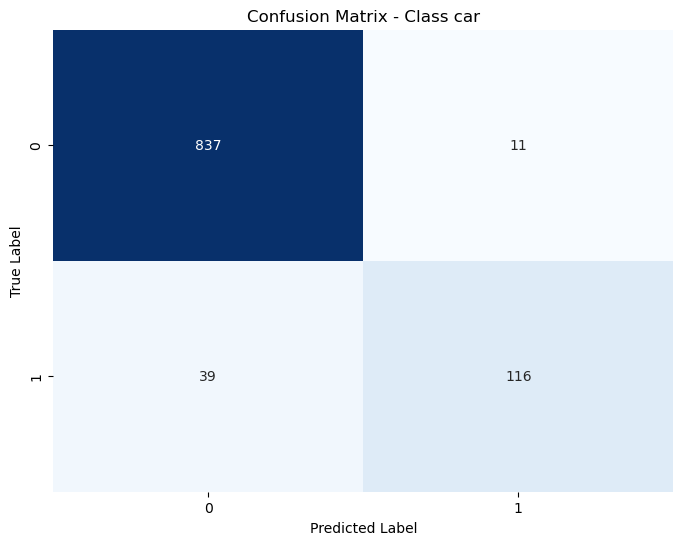

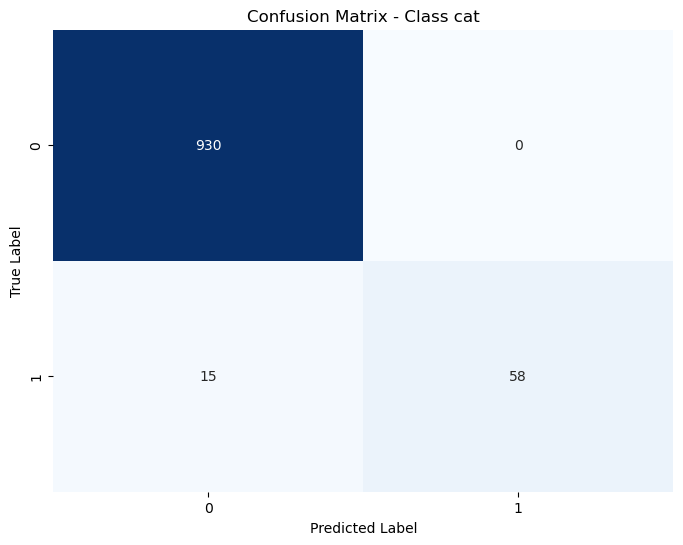

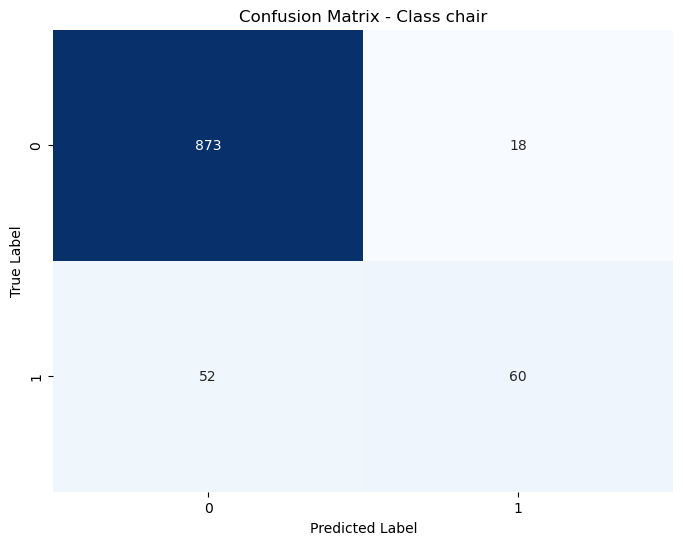

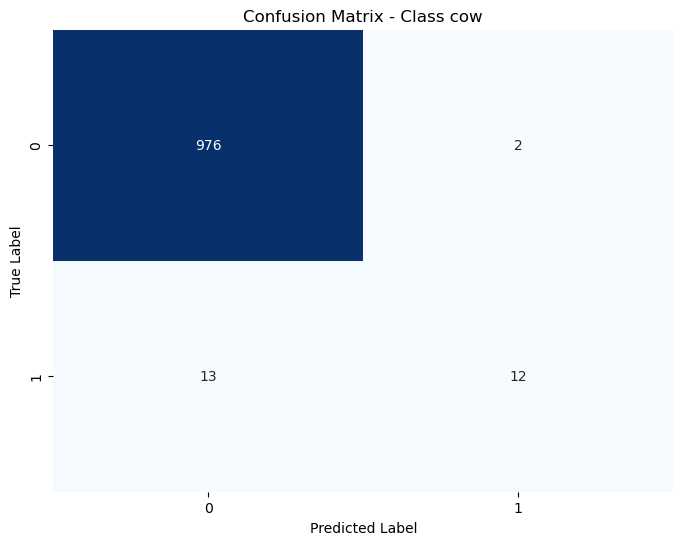

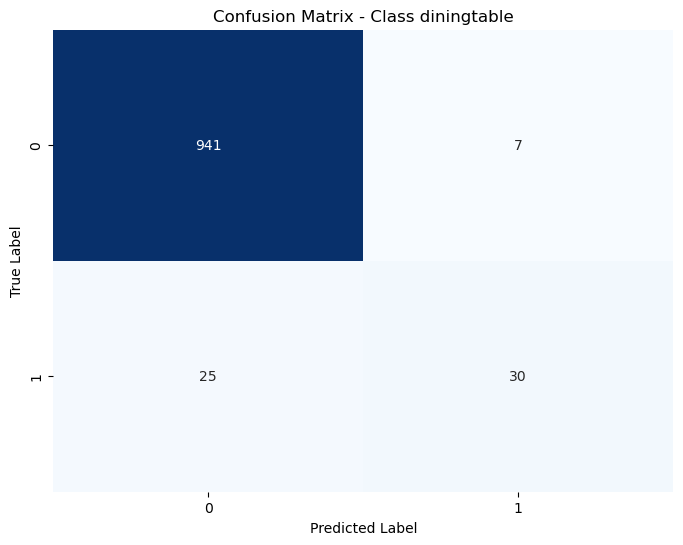

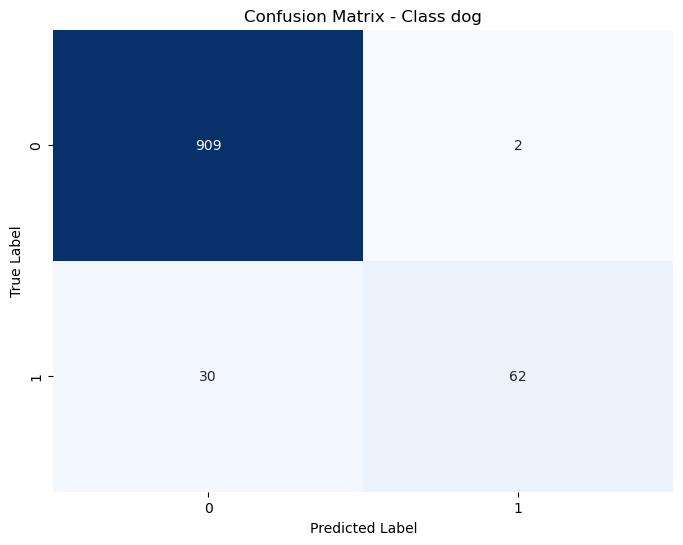

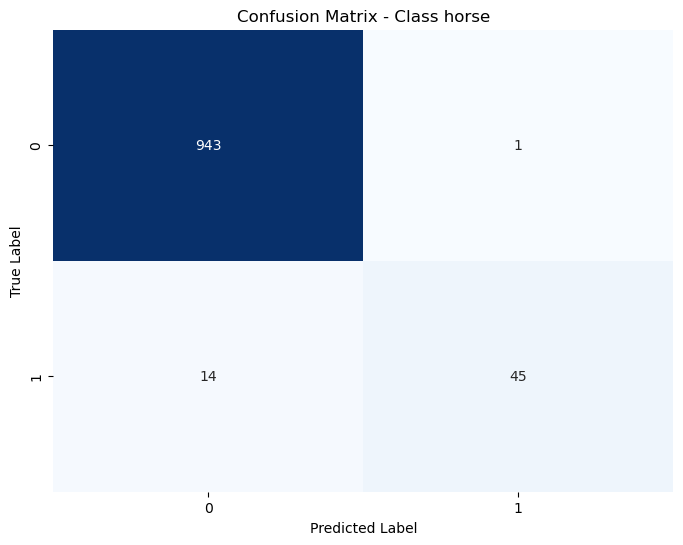

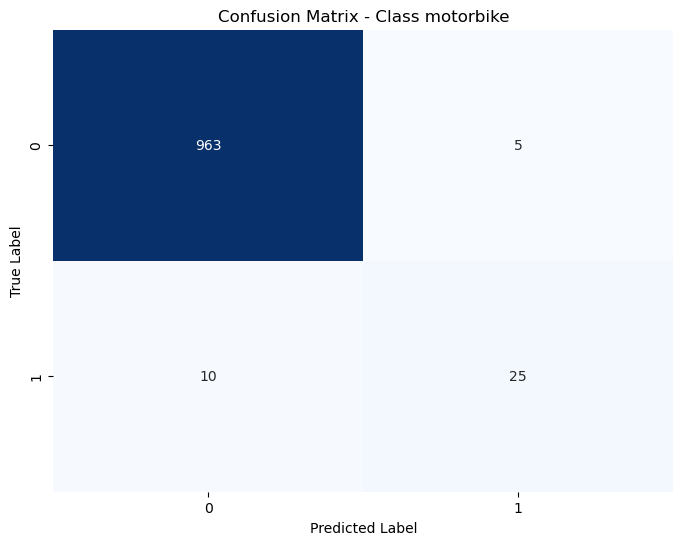

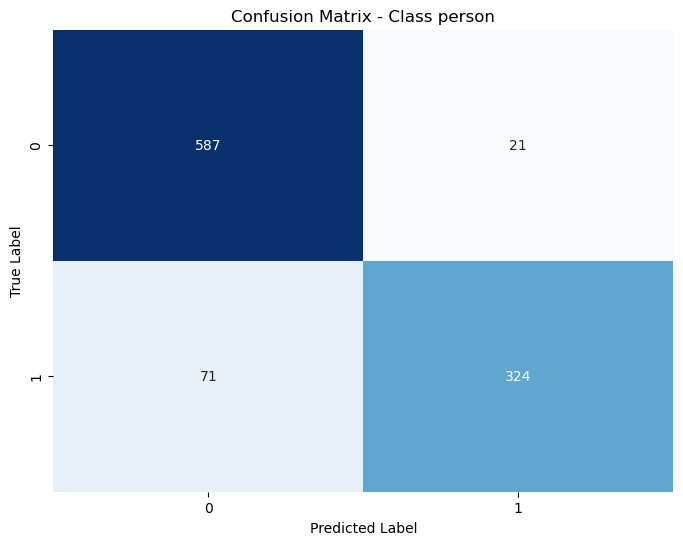

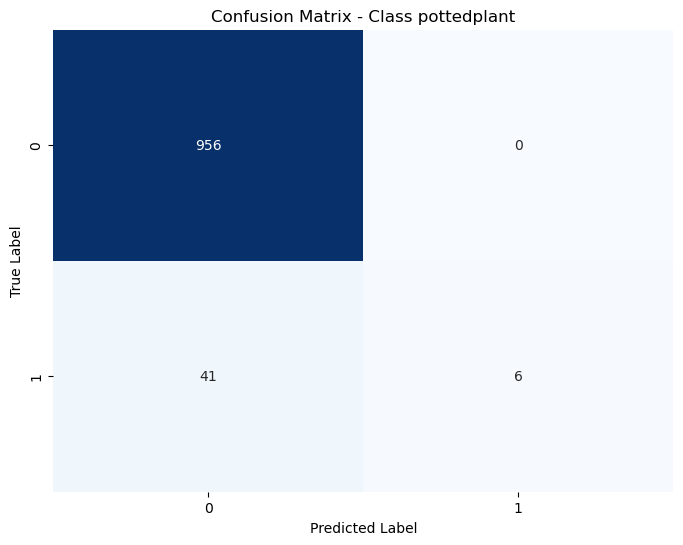

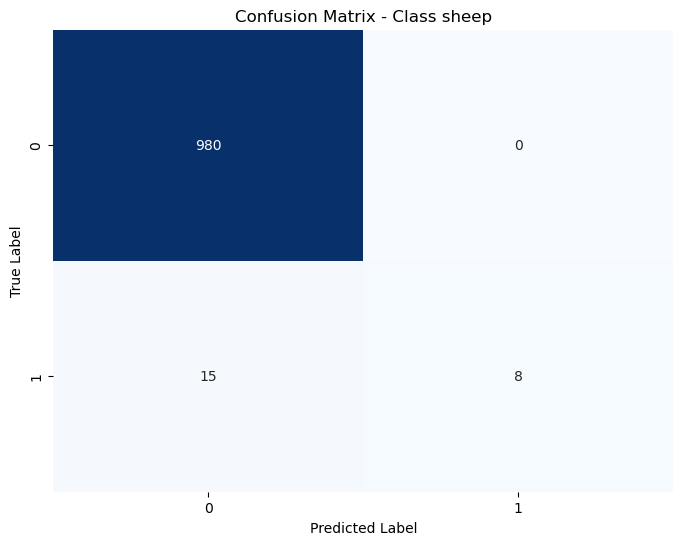

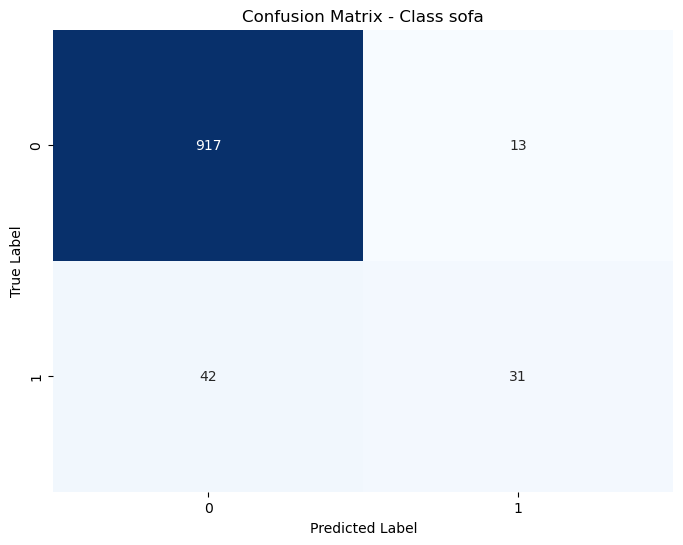

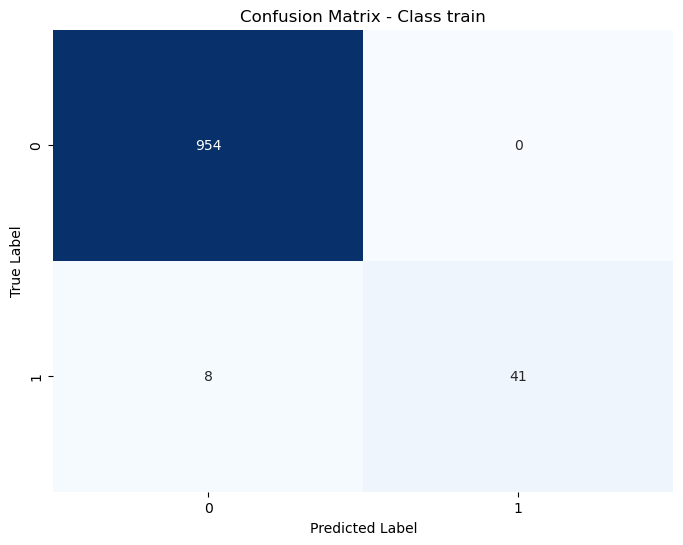

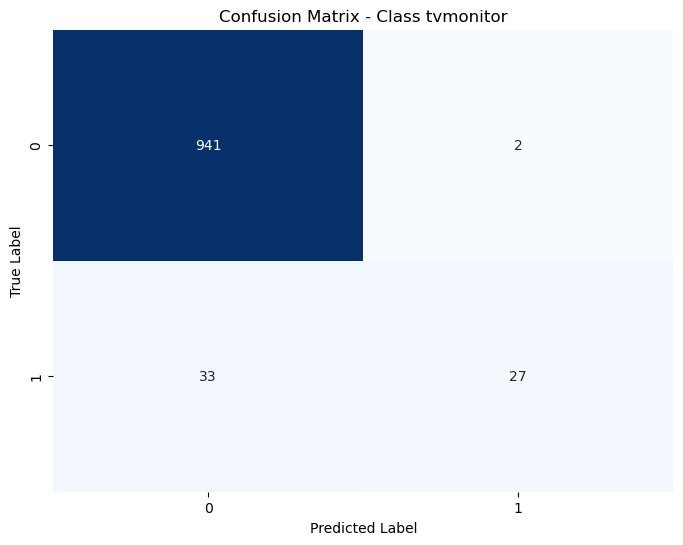

Accuracy for class aeroplane: 0.9860418743768694
Accuracy for class bicycle: 0.9740777666999003
Accuracy for class bird: 0.9830508474576272
Accuracy for class boat: 0.9880358923230309
Accuracy for class bottle: 0.9581256231306082
Accuracy for class bus: 0.9810568295114656
Accuracy for class car: 0.9501495513459621
Accuracy for class cat: 0.9850448654037887
Accuracy for class chair: 0.9302093718843469
Accuracy for class cow: 0.9850448654037887
Accuracy for class diningtable: 0.9680957128614157
Accuracy for class dog: 0.9680957128614157
Accuracy for class horse: 0.9850448654037887
Accuracy for class motorbike: 0.9850448654037887
Accuracy for class person: 0.9082751744765702
Accuracy for class pottedplant: 0.959122632103689
Accuracy for class sheep: 0.9850448654037887
Accuracy for class sofa: 0.9451645064805583
Accuracy for class train: 0.9920239282153539
Accuracy for class tvmonitor: 0.9651046859421735


In [22]:
classifiers = {}
for class_index in range(len(mlb.classes_)):
    class_label = mlb.classes_[class_index]

    # Prepare the training data
    class_train_labels = train_labels[:, class_index]

    # Train the SVM classifier
    svm = SVC()
    svm.fit(train_features, class_train_labels)

    # Save the trained classifier
    classifiers[class_label] = svm

# Evaluate the classifiers on the validation set
accuracies = []
confusion_matrices = []
for class_index in range(len(mlb.classes_)):
    class_label = mlb.classes_[class_index]

    # Prepare the validation data
    class_val_labels = val_labels[:, class_index]

    # Predict labels using the trained classifier
    predicted_labels = classifiers[class_label].predict(val_features)

    # Compute accuracy
    accuracy = np.mean(predicted_labels == class_val_labels)
    accuracies.append(accuracy)

    # Compute confusion matrix
    cm = confusion_matrix(class_val_labels, predicted_labels)
    confusion_matrices.append(cm)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=range(2), yticklabels=range(2))
    plt.title(f"Confusion Matrix - Class {class_label}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Print accuracies
for class_index in range(len(mlb.classes_)):
    class_label = mlb.classes_[class_index]
    accuracy = accuracies[class_index]
    print(f"Accuracy for class {class_label}: {accuracy}")


In [23]:
# Print accuracies
for class_index in range(len(mlb.classes_)):
    class_label = mlb.classes_[class_index]
    accuracy = accuracies[class_index]
    print(f"Accuracy for class {class_label}: {accuracy}")

Accuracy for class aeroplane: 0.9860418743768694
Accuracy for class bicycle: 0.9740777666999003
Accuracy for class bird: 0.9830508474576272
Accuracy for class boat: 0.9880358923230309
Accuracy for class bottle: 0.9581256231306082
Accuracy for class bus: 0.9810568295114656
Accuracy for class car: 0.9501495513459621
Accuracy for class cat: 0.9850448654037887
Accuracy for class chair: 0.9302093718843469
Accuracy for class cow: 0.9850448654037887
Accuracy for class diningtable: 0.9680957128614157
Accuracy for class dog: 0.9680957128614157
Accuracy for class horse: 0.9850448654037887
Accuracy for class motorbike: 0.9850448654037887
Accuracy for class person: 0.9082751744765702
Accuracy for class pottedplant: 0.959122632103689
Accuracy for class sheep: 0.9850448654037887
Accuracy for class sofa: 0.9451645064805583
Accuracy for class train: 0.9920239282153539
Accuracy for class tvmonitor: 0.9651046859421735


### Conclusion

* Overall, the classifiers show relatively high accuracy values, ranging from around 90% to 99%. This indicates that the classifiers are performing well in distinguishing between different object classes.

* Some classes, such as "train" and "boat," achieve particularly high accuracy values above 98%, suggesting that the classifiers are highly effective in correctly identifying instances of these classes.

* On the other hand, some classes, such as "person," "chair," and "sofa," have relatively lower accuracy values around 90%, indicating that the classifiers struggle more with correctly classifying instances of these classes. These classes may have more inherent complexity or similarity with other classes, making them more challenging to classify accurately.

* From the confusion matrix, it can be observed that some classes have a significant number of misclassifications with other classes, while others have minimal confusion.

### References

#### Pascal DataSet:

1. https://datasets.activeloop.ai/docs/ml/datasets/pascal-voc-2007-dataset/
2. https://cv.gluon.ai/build/examples_datasets/pascal_voc.html
3. https://mlhive.com/2022/02/read-and-write-pascal-voc-xml-annotations-in-python
4. https://towardsdatascience.com/coco-data-format-for-object-detection-a4c5eaf518c5
5. https://www.youtube.com/watch?v=VU0pGQfDZHM

#### use the imagenet pretrained model extract features from image:
6. https://www.youtube.com/watch?v=LGk2SfHLhGo
7. https://www.youtube.com/watch?v=7DFod37T3l4
8. https://fairyonice.github.io/Object_detection_with_PASCAL_VOC2012_cnn_feature_extraction.html

#### svm binary classifier one vs rest:
9. https://github.com/christianversloot/machine-learning-articles/blob/main/creating-one-vs-rest-and-one-vs-one-svm-classifiers-with-scikit-learn.md
10. https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/
11. https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html

### Thank You